# Assignment 02 - Decision Trees and Pandas
## COMP3122

### Arash Shalchian - 101414035

## Part A - Decision Trees
Using a Decision Tree model from SKLearn to predict COVID-19 status

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
# Load COVID-19 Dataset from Kaggle
# Source: https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence
# Features: 20 symptoms/risk factors (Breathing Problem, Fever, Dry Cough, etc.)
# Target: COVID-19 (Yes/No)

covid_df = pd.read_csv('Covid Dataset.csv')

print(f"Dataset shape: {covid_df.shape}")
print(f"Number of features: {covid_df.shape[1] - 1}")
print(f"Number of samples: {covid_df.shape[0]}")
print(f"\nColumns:")
print(list(covid_df.columns))
print(f"\nFirst 5 rows:")
covid_df.head()

Dataset shape: (5434, 21)
Number of features: 20
Number of samples: 5434

Columns:
['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market', 'COVID-19']

First 5 rows:


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [40]:
covid_df_encoded = covid_df.replace({'Yes': 1, 'No': 0})

X = covid_df_encoded.drop('COVID-19', axis=1)
y = covid_df_encoded['COVID-19']

print(f"Features ({len(X.columns)} total): {list(X.columns)}")
print(f"\nTarget: COVID-19")
print(f"\nClass distribution:")
print(y.value_counts())
print(f"\n0 = No COVID, 1 = Has COVID")

Features (20 total): ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market']

Target: COVID-19

Class distribution:
COVID-19
1    4383
0    1051
Name: count, dtype: int64

0 = No COVID, 1 = Has COVID


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print(f"Test percentage: {len(X_test) / len(X) * 100:.0f}%")

Training set size: 3803 samples
Test set size: 1631 samples
Test percentage: 30%


In [42]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree model trained successfully!")

Decision Tree model trained successfully!


In [43]:
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy Score: {accuracy:.4f}")
print(f"Model Accuracy Percentage: {accuracy * 100:.2f}%")

Model Accuracy Score: 0.9822
Model Accuracy Percentage: 98.22%


---
## Part B - Working with Pandas
Data analysis and transformation using the assign2.csv file

In [44]:
import matplotlib.pyplot as plt

df = pd.read_csv('assign2.csv')
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")
df.head()

Dataset loaded with 950 rows and 8 columns

Columns: ['ID', 'Range', 'Value', 'Type', 'Zip Code', 'Model', 'Cost', 'Continent']


,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America
3,40,156,44,Q,RHRHJY,IR14,[89$],Asia
4,50,468,33,J,HPQCMC,QX90,[95$],Africa


### Task 1: Permanently delete the 'Model' column. How can you confirm it's deleted?

In [45]:
df.drop('Model', axis=1, inplace=True)

print("Columns after deletion:")
print(list(df.columns))

print(f"\n'Model' in columns: {'Model' in df.columns}")

Columns after deletion:
['ID', 'Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent']

'Model' in columns: False


### Task 2: Remove "[", "$", "]" symbols from the 'Cost' column permanently. What is the column's data type after cleaning?

In [46]:
print("Original Cost values (first 5):")
print(df['Cost'].head())
print(f"Original data type: {df['Cost'].dtype}")

df['Cost'] = df['Cost'].str.replace(r'[\[\]$]', '', regex=True)

print("\nCleaned Cost values (first 5):")
print(df['Cost'].head())
print(f"\nData type after cleaning: {df['Cost'].dtype}")

Original Cost values (first 5):
0    [56$]
1    [18$]
2    [90$]
3    [89$]
4    [95$]
Name: Cost, dtype: object
Original data type: object

Cleaned Cost values (first 5):
0    56
1    18
2    90
3    89
4    95
Name: Cost, dtype: object

Data type after cleaning: object


### Task 3: Convert the 'Cost' column to integer.

In [47]:
df['Cost'] = df['Cost'].astype(int)

print(f"Data type after conversion: {df['Cost'].dtype}")
print(f"\nCost values (first 5):")
print(df['Cost'].head())

Data type after conversion: int32

Cost values (first 5):
0    56
1    18
2    90
3    89
4    95
Name: Cost, dtype: int32


### Task 4: Compute: (a) Average of the 'Cost' column. (b) Average 'Cost' per 'Continent'.

In [48]:
avg_cost = df['Cost'].mean()
print(f"(a) Average Cost: {avg_cost:.2f}")

print("\n(b) Average Cost per Continent:")
avg_cost_per_continent = df.groupby('Continent')['Cost'].mean()
print(avg_cost_per_continent)

(a) Average Cost: 54.63

(b) Average Cost per Continent:
Continent
Africa           54.741259
Antarctica       54.706897
Asia             54.267176
Australia        56.838028
Europe           53.258993
North America    55.284722
South America    53.162963
Name: Cost, dtype: float64


### Task 5: Plot a bar chart showing the mean of numerical columns grouped by 'Continent'.

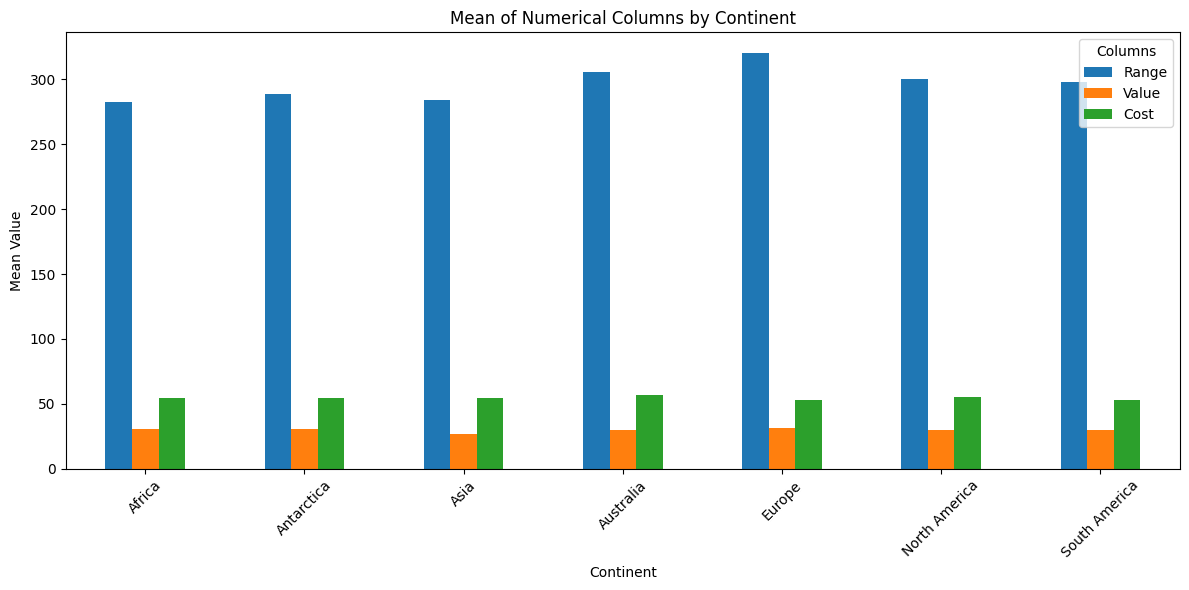

In [49]:
numeric_means = df.groupby('Continent')[['Range', 'Value', 'Cost']].mean()

numeric_means.plot(kind='bar', figsize=(12, 6))
plt.title('Mean of Numerical Columns by Continent')
plt.xlabel('Continent')
plt.ylabel('Mean Value')
plt.legend(title='Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 6: Count how many times each continent appears in the 'Continent' column.

In [50]:
continent_counts = df['Continent'].value_counts()
print("Count of each Continent:")
print(continent_counts)

Count of each Continent:
Continent
North America    144
Africa           143
Australia        142
Europe           139
South America    135
Asia             131
Antarctica       116
Name: count, dtype: int64


### Task 7: Display unique values in the 'Continent' column and count them.

In [51]:
unique_continents = df['Continent'].unique()
print("Unique Continents:")
print(unique_continents)

num_unique = df['Continent'].nunique()
print(f"\nNumber of unique continents: {num_unique}")

Unique Continents:
['Asia' 'North America' 'Africa' 'Europe' 'Antarctica' 'South America'
 'Australia']

Number of unique continents: 7


### Task 8: Use value_counts() on the 'Cost' column and describe the output in a comment.

In [52]:
cost_value_counts = df['Cost'].value_counts()
print("Value counts for Cost column:")
print(cost_value_counts)

Value counts for Cost column:
Cost
56    20
35    20
73    18
54    17
97    17
      ..
30     5
77     5
92     5
42     3
24     2
Name: count, Length: 90, dtype: int64


### Task 9: Plot a histogram of the 'Cost' column (bonus: use 50 bins).

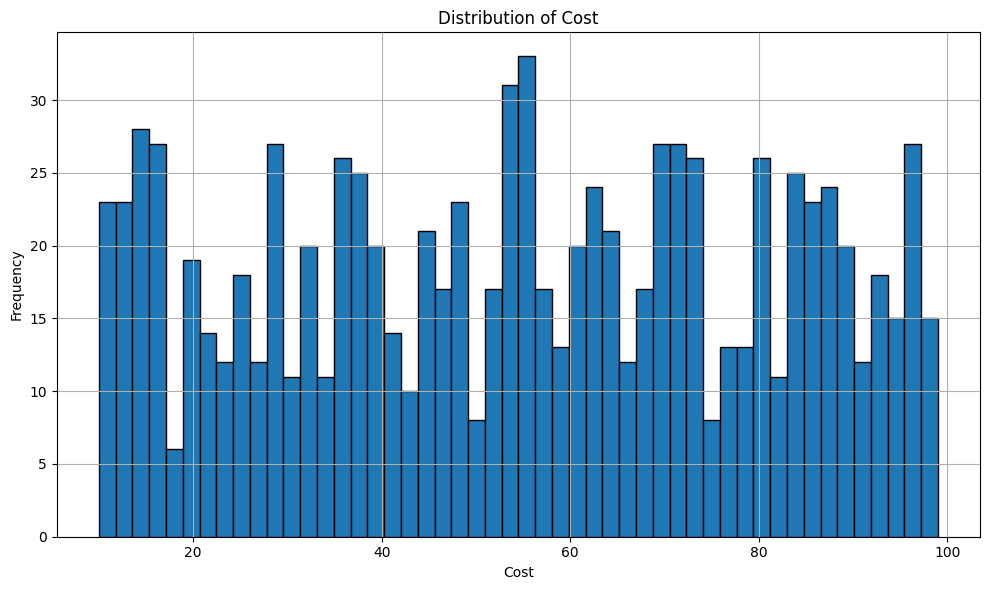

In [53]:
plt.figure(figsize=(10, 6))
df['Cost'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Task 10: Find missing values in 'Zip Code' and 'Type' columns; summarize all null values in the DataFrame.

In [54]:
print("Missing values in 'Zip Code':")
print(f"Count: {df['Zip Code'].isna().sum()}")

print("\nMissing values in 'Type':")
print(f"Count: {df['Type'].isna().sum()}")

print("\nSummary of all null values in DataFrame:")
print(df.isna().sum())

print(f"\nTotal missing values: {df.isna().sum().sum()}")

Missing values in 'Zip Code':
Count: 9

Missing values in 'Type':
Count: 2

Summary of all null values in DataFrame:
ID           0
Range        0
Value        0
Type         2
Zip Code     9
Cost         0
Continent    0
dtype: int64

Total missing values: 11


### Task 11: Show the statistics for 'Type' including NaN values. Replace missing 'Type' values with 'XXX'.

In [55]:
print("Statistics for 'Type' column (including NaN):")
print(df['Type'].describe())

print("\nValue counts including NaN:")
print(df['Type'].value_counts(dropna=False))

df['Type'].fillna('XXX', inplace=True)

print("\nAfter replacing NaN with 'XXX':")
print(f"Missing values in Type: {df['Type'].isna().sum()}")
print(f"\n'XXX' count: {(df['Type'] == 'XXX').sum()}")

Statistics for 'Type' column (including NaN):
count     948
unique     26
top         F
freq       50
Name: Type, dtype: object

Value counts including NaN:
Type
F      50
N      47
Q      45
Z      44
C      43
K      41
V      41
A      40
Y      39
H      39
X      38
G      38
M      38
O      36
U      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
NaN     2
Name: count, dtype: int64

After replacing NaN with 'XXX':
Missing values in Type: 0

'XXX' count: 2


### Task 12: Drop all rows with any missing values — how many rows remain?

In [60]:
print(f"Rows before dropping: {len(df)}")

df.dropna(inplace=True)

print(f"Rows remaining after dropna: {len(df)}")

Rows before dropping: 941
Rows remaining after dropna: 941


### Task 13: Use describe() to see statistics, and fetch the value of the first row and third column of the result.

In [57]:
stats = df.describe()
print("Statistics using describe():")
print(stats)

first_row_third_col = stats.iloc[0, 2]
print(f"\nFirst row, third column of describe(): {first_row_third_col}")
print(f"(This is the 'count' of the '{stats.columns[2]}' column)")

Statistics using describe():
                ID       Range       Value        Cost
count   941.000000  941.000000  941.000000  941.000000
mean   4734.091392  297.435707   29.931987   54.652497
std    2747.571064  115.831469   12.287671   25.786838
min      10.000000  100.000000   10.000000   10.000000
25%    2360.000000  194.000000   19.000000   33.000000
50%    4710.000000  296.000000   30.000000   55.000000
75%    7090.000000  400.000000   41.000000   76.000000
max    9500.000000  500.000000   50.000000   99.000000

First row, third column of describe(): 941.0
(This is the 'count' of the 'Value' column)


### Task 14: Sort the value_counts() of 'Continent' by frequency, then alphabetically.

In [58]:
print("Continent counts sorted by frequency (descending):")
freq_sorted = df['Continent'].value_counts()
print(freq_sorted)

print("\nContinent counts sorted alphabetically:")
alpha_sorted = df['Continent'].value_counts().sort_index()
print(alpha_sorted)

Continent counts sorted by frequency (descending):
Continent
North America    142
Australia        141
Africa           139
Europe           138
South America    135
Asia             131
Antarctica       115
Name: count, dtype: int64

Continent counts sorted alphabetically:
Continent
Africa           139
Antarctica       115
Asia             131
Australia        141
Europe           138
North America    142
South America    135
Name: count, dtype: int64


---
## Summary
This notebook demonstrates:
1. **Part A**: Building a Decision Tree classifier for COVID-19 prediction using scikit-learn
2. **Part B**: Various pandas operations including data cleaning, transformation, aggregation, and visualization